In [1]:
# import pandas as pd
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
%matplotlib inline
from pandas import DataFrame
from sklearn import linear_model
import tkinter as tk 
import statsmodels.api as sm
from datetime import datetime
from pandas.api.types import CategoricalDtype

In [2]:
apt = pd.read_csv("2016_Apt.csv")
len(apt)

6883674

In [5]:
aptt=apt.T

In [6]:
pd.set_option('display.max_rows', 90)
pd.get_option('display.max_rows')

90

In [6]:
display(aptt)

,0,1,2,3,4,5,6,7,8,9,...,6883664,6883665,6883666,6883667,6883668,6883669,6883670,6883671,6883672,6883673
DEP_YYYYMM,201612,201601,201601,201601,201601,201601,201601,201601,201601,201601,...,201612,201612,201612,201612,201605,201603,201612,201612,201603,201603
DEP_DAY,17,1,2,3,4,5,6,7,8,10,...,26,27,30,23,26,8,23,23,8,8
DEP_HOUR,16,11,11,11,11,11,11,11,11,11,...,2,6,12,9,7,22,9,9,22,22
DEP_QTR,2,3,3,3,3,3,3,3,3,3,...,3,4,3,1,4,1,2,2,2,1
ARR_YYYYMM,201612,201601,201601,201601,201601,201601,201601,201601,201601,201601,...,201612,201612,201612,201612,201605,201603,201612,201612,201603,201603
ARR_DAY,17,1,2,3,4,5,6,7,8,10,...,26,27,30,23,26,8,23,23,8,8
ARR_HOUR,18,14,14,14,14,14,14,14,14,14,...,11,15,20,11,8,23,11,11,23,23
ARR_QTR,2,3,3,3,3,3,3,3,3,3,...,3,4,4,2,4,1,1,2,1,1
OFF_YYYYMM,201612,201601,201601,201601,201601,201601,201601,201601,201601,201601,...,201612,201612,201612,201612,201605,201603,201612,201612,201603,201603
OFF_DAY,17,1,2,3,4,5,6,7,8,10,...,26,27,30,23,26,8,23,23,8,8


In [7]:
apt['ARR_LOCID']=apt['ARR_LOCID'].apply(lambda x: x.replace(" ", ""))
apt['DEP_LOCID']=apt['DEP_LOCID'].apply(lambda x: x.replace(" ", ""))

In [8]:
arr_apt=apt['ARR_LOCID'].unique()
print(arr_apt,len(arr_apt))

['MIA' 'BWI' 'IAD' 'LGA' 'RDU' 'BNA' 'ATL' 'ABQ' 'BOS' 'DFW' 'PBI' 'FLL'
 'HOU' 'OAK' 'PHX' 'TEB' 'SJC' 'EWR' 'JFK' 'SLC' 'LAS' 'SFO' 'DEN' 'LAX'
 'MCO' 'PIT' 'STL' 'MDW' 'ORD' 'CLT' 'CVG' 'MSY' 'SAN' 'IAH' 'MEM' 'SEA'
 'MSP' 'CLE' 'PDX' 'IND' 'TPA' 'MCI' 'DTW' 'PHL' 'DCA'] 45


In [9]:
dep_apt=apt['DEP_LOCID'].unique()
print(dep_apt,len(dep_apt))

['TNCC' 'TNCA' 'LERT' ... '1F0' 'CBF' 'PSB'] 2683


In [10]:
CL30='ATL - Hartsfield-Jackson Atlanta Intl BOS - Boston Logan Intl BWI - Baltimore/Washington Intl CLT - Charlotte Douglas Intl DCA - Ronald Reagan Washington National DEN - Denver Intl DFW - Dallas/Fort Worth Intl DTW - Detroit Metropolitan Wayne County EWR - Newark Liberty Intl FLL - Fort Lauderdale/Hollywood Intl HNL - Honolulu Intl IAD - Washington Dulles Intl IAH - George Bush Houston Intercontinental JFK - New York John F. Kennedy Intl LAS - Las Vegas McCarran Intl LAX - Los Angeles Intl LGA - New York LaGuardia MCO - Orlando Intl MDW - Chicago Midway MEM - Memphis Intl MIA - Miami Intl MSP - Minneapolis/St. Paul Intl ORD - Chicago O`Hare Intl PHL - Philadelphia Intl PHX - Phoenix Sky Harbor Intl SAN - San Diego Intl SEA - Seattle/Tacoma Intl SFO - San Francisco Intl SLC - Salt Lake City Intl TPA - Tampa Intl'
CL30=CL30.replace(" ", "")
C30=np.array([])
while (CL30.find('-')!=-1):
    i=CL30.find('-')
    C30=np.append(C30,CL30[(i-3):i])
    CL30=CL30[:i] + CL30[i+1:] 
C30=C30.tolist()
del C30[1]

In [11]:
#FOR ARRIVING AIRPORT
n=0
for i in range(30):
    if C30[i] in arr_apt:
        n=n+1
    else:
        print(C30[i])

HNL


In [12]:
#FOR DEPARTURE AIRPORT
n=0
for i in range(30):
    if C30[i] in dep_apt:
        n=n+1
    else:
        print(C30[i])

## Filtering data -- domestic flight for C30 airport

In [13]:
# DEP ARR: C30; aircraft calss is commercial 
x=(apt['ARR_LOCID'].isin(C30))&(apt['DEP_LOCID'].isin(C30)&(apt['USER_CLASS']=='C')) 
print('avaliable obs:',sum(x))
usapt_all=apt[x]

avaliable obs: 2465472


In [14]:
#usapt_a14=usapt_all[usapt_all[]] Departure
usapt_a0=usapt_all[usapt_all['O_GATE_DEL']>0]
print('A0:',len(usapt_a0))
usapt_a14=usapt_all[usapt_all['O_GATE_DEL']>=15]
print('A14:',len(usapt_a14))

A0: 934419
A14: 473500


In [15]:
# arrvival delay
usapt_a0_a=usapt_all[usapt_all['O_ARR_DEL']>0]
print('A0:',len(usapt_a0_a))
usapt_a14_a=usapt_all[usapt_all['O_ARR_DEL']>=15]
print('A14:',len(usapt_a14_a))

A0: 899362
A14: 496406


In [16]:
def week(x):
    date=str(x['DEP_YYYYMM'])[0:4]+','+str(x['DEP_YYYYMM'])[4:6]+','+str(x['DEP_DAY'])
    date=datetime.strptime(date,'%Y,%m,%d')
    weekday=date.weekday()
    if weekday<5:
        return 1
    else:
        return 0

In [17]:
usapt_a14['Weekday']=usapt_a14.apply(week,axis=1)
usapt_a14_a['Weekday']=usapt_a14_a.apply(week,axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Great Circle Distance

In [18]:
# unit: mile
from math import radians, cos, sin, asin, sqrt
def distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    mile = 3958.76* c #km = 6371* c 
    return mile

In [19]:
apt_map=pd.read_csv("Airport_LL.csv")

In [20]:
apt_c30=apt_map[apt_map['AIRPORT'].isin(C30)].groupby('AIRPORT').first()
namelist=apt_c30.index.tolist()
apt_c30.T

AIRPORT,ATL,BOS,BWI,CLT,DCA,DEN,DFW,DTW,EWR,FLL,...,MIA,MSP,ORD,PHL,PHX,SAN,SEA,SFO,SLC,TPA
AIRPORT_SEQ_ID,1039701,1072101,1082102,1105701,1127801,1129201,1129801,1143301,1161801,1169701,...,1330301,1348701,1393001,1410001,1410701,1467901,1474701,1477101,1486901,1530401
AIRPORT_ID,10397,10721,10821,11057,11278,11292,11298,11433,11618,11697,...,13303,13487,13930,14100,14107,14679,14747,14771,14869,15304
DISPLAY_AIRPORT_NAME,Atlanta Municipal,Logan International,Baltimore/Washington International,Douglas Municipal,Ronald Reagan Washington National,Stapleton International,Dallas Fort Worth Regional,Detroit Metro Wayne County,Newark Liberty International,Fort Lauderdale-Hollywood International,...,Miami International,Minneapolis-St Paul International,Chicago O'Hare International,Philadelphia International,Phoenix Sky Harbor International,San Diego International Lindbergh Fl,Seattle International,San Francisco International,Salt Lake City International,Tampa International
DISPLAY_AIRPORT_CITY_NAME_FULL,"Atlanta, GA","Boston, MA","Baltimore, MD","Charlotte, NC","Washington, DC","Denver, CO","Dallas/Fort Worth, TX","Detroit, MI","Newark, NJ","Fort Lauderdale, FL",...,"Miami, FL","Minneapolis, MN","Chicago, IL","Philadelphia, PA","Phoenix, AZ","San Diego, CA","Seattle, WA","San Francisco, CA","Salt Lake City, UT","Tampa, FL"
AIRPORT_WAC,34,13,35,36,38,82,74,43,21,33,...,33,63,41,23,81,91,93,91,87,33
AIRPORT_COUNTRY_NAME,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,...,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
AIRPORT_COUNTRY_CODE_ISO,US,US,US,US,US,US,US,US,US,US,...,US,US,US,US,US,US,US,US,US,US
AIRPORT_STATE_NAME,Georgia,Massachusetts,Maryland,North Carolina,Virginia,Colorado,Texas,Michigan,New Jersey,Florida,...,Florida,Minnesota,Illinois,Pennsylvania,Arizona,California,Washington,California,Utah,Florida
AIRPORT_STATE_CODE,GA,MA,MD,NC,VA,CO,TX,MI,NJ,FL,...,FL,MN,IL,PA,AZ,CA,WA,CA,UT,FL
AIRPORT_STATE_FIPS,13,25,24,37,51,8,48,26,34,12,...,12,27,17,42,4,6,53,6,49,12


In [21]:
GCD=[[0 for x in range(30)] for y in range(30)] #W,H
DIS=[]
for i in range(30):
    for j in range(30): #22 LON; 17 LAT
        GCD[i][j]=round(distance(int(apt_c30.iloc[i,22]), int(apt_c30.iloc[i,17]), 
                           int(apt_c30.iloc[j,22]), int(apt_c30.iloc[j,17])),6) 
        DIS.append(GCD[i][j])

In [22]:
Lat=[[0 for x in range(30)] for y in range(30)] #W,H
for i in range(30):
    for j in range(30): #22 LON; 17 LAT
        Lat[i][j]=int(apt_c30.iloc[j,22])-int(apt_c30.iloc[i,22])

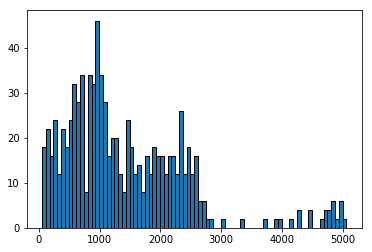

In [23]:
DIS=pd.Series(DIS)
plt.hist(DIS[DIS>0],bins=80,ec='black');

In [24]:
gcd=pd.DataFrame(np.array(GCD),columns=namelist)
gcd['index']=namelist
gcd=gcd.set_index('index') #gcd.loc['ATL','ATL']

In [25]:
lat=pd.DataFrame(np.array(Lat),columns=namelist)
lat['index']=namelist
lat=lat.set_index('index') #gcd.loc['ATL','ATL']

In [26]:
lat.loc['SFO','JFK'] # Dep Arr 

49

In [27]:
gcd.loc['DFW','ORD']

832.59334

## HUB AIRPORT

In [30]:
hub=pd.read_csv("HUB.csv")
hub=hub['Aiport'].groupby(hub['ICAO']).apply(list).to_frame()
hub

,Aiport
ICAO,
AAL,"[PHL, PHX, DFW, JFK, LAX, ORD, CLT]"
DAL,"[ATL, DTW, MSP, LAX, SLC, JFK]"
SWA,"[DEN, LAS, PHX, ATL, MCO, MDW, BWI]"
UAL,"[SFO, LAX, DEN, IAH, EWR, ORD, IAD]"


## Weather 

In [31]:
wt = pd.read_csv("2016_WT.csv")
wt['LOCID']=wt['LOCID'].apply(lambda x: x.replace(" ", ""))

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (67,68,72,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
#wtt=wt.T

In [32]:
# check airport
airport=wt['LOCID'].unique()
print('total airports:', len(airport))
n=0
for i in range(30):
    if C30[i] in airport:
        n=n+1
    else:
        print(C30[i])

total airports: 45
HNL


## Connecting time

In [33]:
usapt_all['TAILNO']=usapt_all['TAILNO'].apply(lambda x: x.replace(" ", ""))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
con_time=pd.Series()
def connect (test):
    global con_time
    test=test.sort_values(by='WHEELS_OFF',ascending=False)
    ct=[]
    if len(test)>1:
        for i in range(len(test)-1):
            x=(test.iloc[i]['OAG_S_ARR']-test.iloc[i+1]['OAG_S_DEP'])/60
            ct.append(x)
        ct.append(int(np.mean(ct)))
    else:
        ct=30000
    test['con_time']=ct
    con_time=con_time.append(test['con_time'])    

In [35]:
usapt_all.groupby('TAILNO').agg(connect)

,DEP_YYYYMM,DEP_DAY,DEP_HOUR,DEP_QTR,ARR_YYYYMM,ARR_DAY,ARR_HOUR,ARR_QTR,OFF_YYYYMM,OFF_DAY,...,OAG_S_ARR,T_OAG_S_AR,ADJ_OAG_ARR,T_ADJ_OAG_ARR,OOOI_ARR,T_OOOI_ARR,DELAY_TI,DIF_G2G,O_ARR_DEL,DELAY_ARR
TAILNO,,,,,,,,,,,,,,,,,,,,,
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4XECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4XECE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4XECF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4XELD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
con_time=con_time.to_frame()
usapt_all=usapt_all.merge(con_time,how='left',left_index=True,right_index=True)

In [37]:
usapt_all=usapt_all.rename(index=str, columns={0: "ConnectTime"}) #.to_frame()

## Carrier

In [37]:
#usapt_all['FAACARRIER'].value_counts()

## Flight Aggregation 

### Linear Regression

In [38]:
result0=usapt_all

In [39]:
result=result0[['FLTNO','FAACARRIER','ETMS_EQPT','DEP_YYYYMM','DEP_DAY','DEP_HOUR','DEP_QTR','ARR_YYYYMM',
                'ARR_DAY','ARR_QTR','ARR_HOUR','OAG_S_DEP','WHEELS_OFF','FILED_ETE','AIRBORNE','DEP_LOCID',
                'ARR_LOCID','T_WHLS_ON','OAG_S_G2G','ConnectTime']] #'ETMS_EQPT'
result=result.rename(index=str, columns={"FAACARRIER":"Airline","OAG_S_DEP": "S_dep", "ETMS_EQPT":"Aircraft",
                                         "WHEELS_OFF": "A_wf",
                                         "FILED_ETE": "S_air","AIRBORNE": "A_air","DEP_LOCID":"Dep",
                                         "ARR_LOCID":'Arr','T_WHLS_ON':'A_wn',"OAG_S_G2G":"Block"})

In [40]:
# Actual Wheels Off Time - Scheduled Departure Time 
result['DELAY']=(result['A_wf']-result['S_dep'])/60

In [41]:
# decide the hub
result=result.reset_index(drop=True)
def hubcheck(x):
    if x['Airline'] in hub.index.tolist():
        if x['Dep'] in hub.loc[x['Airline'],'Aiport']:
            return 1
    else:
        return 0
    
result['Dep_Hub']=result.apply(hubcheck,axis=1).fillna(0)


def hubcheck1(x):
    if x['Airline'] in hub.index.tolist():
        if x['Arr'] in hub.loc[x['Airline'],'Aiport']:
            return 1
    else:
        return 0
    
result['Arr_Hub']=result.apply(hubcheck1,axis=1).fillna(0)

In [42]:
# GCD
def distance(x):
    return gcd.loc[x['Arr'],x['Dep']]
result['GCD']=result.apply(distance,axis=1)

In [43]:
# nominal airborn speed (unit:knots)
#result['speed']=result['GCD']/result['S_air']*60*0.868976
#result['Speed']=result['GCD']/result['Block']*60/1.15

In [45]:
#weekday dummy (weekday:1, weekend:0) 201606	6
def week(x):
    date=str(x['DEP_YYYYMM'])[0:4]+','+str(x['DEP_YYYYMM'])[4:6]+','+str(x['DEP_DAY'])
    date=datetime.strptime(date,'%Y,%m,%d')
    weekday=date.weekday()
    if weekday<5:
        return 1
    else:
        return 0 
result['Weekday']=result.apply(week,axis=1)

In [46]:
#Quater Dummy 'DEP_QTR'
def mm(x):
    m=int(str(x)[4:6])
    return m
month=result['DEP_YYYYMM'].apply(mm)
result['Winter']=((month==12) | (month <3)).astype(int)
result['Spring']=((month>2) & (month <6)).astype(int)
result['Summer']=((month>5) & (month <9)).astype(int)
result['Fall']=((month>8) & (month <12)).astype(int)

In [47]:
def quater(x):
    if x['Winter']==1:
        out= 'winter'
    if x['Spring']==1:
        out= 'spring'
    if x['Summer']==1:
        out= 'summer'
    if x['Fall']==1:
        out= 'fall'
    return out

result['Quater']=result.apply(quater,axis=1)

In [48]:
# LAT DIFFERENCE
def lat_dif(x):
    return lat.loc[x['Dep'],x['Arr']]

result['HeadingDegree(E+)']=result.agg(lat_dif,axis=1)

In [49]:
# define new variables DIF_SBT
result=result.rename(index=str, columns={'Block': 'SBT'})
mean_sbt=result[['Dep','Arr','Aircraft','Airline','Quater','SBT']].groupby(['Dep','Arr','Aircraft','Airline','Quater']).mean()
mean_sbt=mean_sbt.rename(index=str, columns={'SBT': 'SBT_mean'})
result=result.merge(mean_sbt,how='left', left_on=['Dep','Arr','Aircraft','Airline','Quater'], 
                           right_on =['Dep','Arr','Aircraft','Airline','Quater'])
result['Dif_SBT']=result['SBT']-result['SBT_mean']

In [50]:
## congestion level and weather
data=wt[['LOCID','YYYYMM','DAYNUM','HR_LOCAL','QTR','MC','CEILING','VISIBLE','TEMP',
        'WND_ANGL','WND_SPED','RUNWAY','DEP_DEMAND','ARR_DEMAND','ETMS_DEP','ETMS_ARR',
        'DEP_RATE','ARR_RATE']]
data=data[data['LOCID'].isin(C30)]
data=data.rename(index=str, columns={'LOCID':'Airport','DEP_DEMAND':'Sche_Dep','ARR_DEMAND':'Sche_Arr',
                                     'ETMS_DEP':'Act_Dep','ETMS_ARR':'Act_Arr','DEP_RATE':'Cap_Dep',
                                     'ARR_RATE':'Cap_Arr'})

In [51]:
final=pd.merge(result, data,  how='left', left_on=['Dep','DEP_YYYYMM','DEP_DAY','DEP_HOUR','DEP_QTR'], 
         right_on = ['Airport','YYYYMM','DAYNUM','HR_LOCAL','QTR'])
final=final.rename(index=str, columns={'MC':'Dep_MC','CEILING':'Dep_ceiling','VISIBLE':'Dep_visible',
                                       'TEMP':'Dep_temp','WND_ANGL':'Dep_windangle','WND_SPED':'Dep_windspeed',
                                       'RUNWAY':'Dep_runway','Sche_Dep':'Dep_schdep','Sche_Arr':'Dep_scharr',
                                       'Act_Dep':'Dep_actdep','Act_Arr':'Dep_actarr','Cap_Dep':'Dep_capdep',
                                       'Cap_Arr':'Dep_caparr'})

final=pd.merge(final, data,  how='left', left_on=['Arr','ARR_YYYYMM','ARR_DAY','ARR_HOUR','ARR_QTR'], 
         right_on = ['Airport','YYYYMM','DAYNUM','HR_LOCAL','QTR'])

final=final.rename(index=str, columns={'MC':'Arr_MC','CEILING':'Arr_ceiling','VISIBLE':'Arr_visible',
                                       'TEMP':'Arr_temp','WND_ANGL':'Arr_windangle','WND_SPED':'Arr_windspeed',
                                       'RUNWAY':'Arr_runway','Sche_Dep':'Arr_schdep','Sche_Arr':'Arr_scharr',
                                       'Act_Dep':'Arr_actdep','Act_Arr':'Arr_actarr','Cap_Dep':'Arr_capdep',
                                       'Cap_Arr':'Arr_caparr'})

final=final.drop(['Airport_x','YYYYMM_x','DAYNUM_x','HR_LOCAL_x','QTR_x',
                 'Airport_y','YYYYMM_y','DAYNUM_y','HR_LOCAL_y','QTR_y'], axis=1)

In [52]:
final['Dep_MC']=(final['Dep_MC']=='V').astype(int)
final['Arr_MC']=(final['Arr_MC']=='V').astype(int)

In [53]:
final['Dep%']=final['Dep_actdep']/final['Dep_capdep']
final['Arr%']=final['Arr_actarr']/final['Arr_caparr']

# eliminate the infinite value
final['Dep_congest']=final['Dep%'].apply(lambda x: 2 if x>2 else x)
final['Arr_congest']=final['Arr%'].apply(lambda x: 2 if x>2 else x)

In [54]:
len(final)

2465472

In [55]:
nan_number=len(result0)-len(final)
print('missing value records:',nan_number/len(result0),nan_number)

missing value records: 0.0 0


In [56]:
final.replace(['      ','M     '], np.nan, inplace=True)
final=final.dropna(axis='rows')
final['Dep_temp']=final['Dep_temp'].astype(int)
final['Dep_windspeed']=final['Dep_windspeed'].astype(int)
final['Arr_temp']=final['Arr_temp'].astype(int)
final['Arr_windspeed']=final['Arr_windspeed'].astype(int)

In [57]:
#
final['time_window']=uni_tim.agg(lambda x:
                    datetime.utcfromtimestamp(x+10*365*24*3600+24*3600*2).strftime('%Y-%m-%d %H:%M:%S'))

NameError: name 'uni_tim' is not defined

In [58]:
# time of day: departure time 
final['T:0600-2000']=((final['DEP_HOUR']>=6)&(final['DEP_HOUR']<20)).astype(int)
#final['T:2000-0600']=

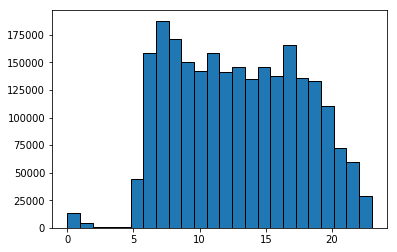

In [59]:
plt.hist(final['DEP_HOUR'],bins=24,ec='black')
plt.show()

In [60]:
def QQ1(x):
    Q1 = x.quantile(0.15)
    Q3 = x.quantile(0.85)
    IQR = Q3 - Q1
    return Q1 - 1.5 * IQR

def QQ2(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    return Q3+1.5 * IQR

In [61]:
# filtering

# (0) extreme long actual airborne time
out=final
c1=out['A_air'].groupby([out['Dep'],out['Arr']]).agg(QQ1)
c1=c1.to_frame().reset_index()
c1=c1.rename(index=str, columns={"A_air":"Q1"})
c2=out['A_air'].groupby([out['Dep'],out['Arr']]).agg(QQ2)
c2=c2.to_frame().reset_index()
c2=c2.rename(index=str, columns={"A_air":"Q3"})

test=pd.merge(out, c1,  how='left', left_on=['Dep','Arr'], 
         right_on =['Dep','Arr'])
test=pd.merge(test, c2,  how='left', left_on=['Dep','Arr'], 
         right_on =['Dep','Arr'])

test=test[(test['A_air']>=test['Q1']) &(test['A_air']<=test['Q3'])]

In [62]:
n=len(final)-len(test)
print('percent dedcution:',n/len(final),'(',n,')')

percent dedcution: 0.025741134281867424 ( 62938 )


In [63]:
out_delay1=QQ2(test['DELAY'])
out_delay2=QQ1(test['DELAY'])
n=len(test)-sum((test['DELAY']<=out_delay1)&(test['DELAY']>=out_delay2))
print('delay percent dedcution:',n/len(test),'(',n,')')

out_ct1=QQ2(test['ConnectTime'])
out_ct2=QQ1(test['ConnectTime'])
n=len(test)-sum((test['ConnectTime']<=out_ct1)&(test['ConnectTime']>=out_ct2))
print('CT percent dedcution:',n/len(test),'(',n,')')

delay percent dedcution: 0.10634323189054355 ( 253320 )
CT percent dedcution: 0.10069526946414463 ( 239866 )


In [64]:
n=sum(test['GCD']==0)
print('GCD percent dedcution:',n/len(test),'(',n,')')

GCD percent dedcution: 0.00018051314429549077 ( 430 )


In [65]:
# (1) GCD >0
test_fill=test[test['GCD']>0]
# (2) Actual Flight Time (EWR JFK/JFK LGA/EWR LGA)>  9 min??? --> 20 min 
#test_fill=test_fill[test['A_air']>=20]
# (3) Speed < IQR
#out_speed1=QQ2(test['Speed'])
#out_speed2=QQ1(test['Speed'])
#test_fill=test_fill[(test_fill['Speed']<=out_speed1)&(test_fill['Speed']>=out_speed2)]
#(4) Delay < IQR
out_delay1=QQ2(test['DELAY'])
out_delay2=QQ1(test['DELAY'])
test_fill=test_fill[(test_fill['DELAY']<=200)&(test_fill['DELAY']>=out_delay2)]
# (5) Connecting time
#out_ct1=QQ2(test['ConnectTime'])
#out_ct2=QQ1(test['ConnectTime'])
#test_fill=test_fill[(test_fill['ConnectTime']<=out_ct1)&(test_fill['ConnectTime']>=out_ct2)]

In [66]:
len(test_fill)/len(result0)

0.9559625905303325

In [ ]:
test_fill['ln_air']=np.log(test_fill['A_air'])

$$\begin{align}
\text{ln(Actual Airborne Time)} & = \theta_0 + \theta_1 \cdot \text{OD_pairs} + \theta_2 \cdot \text{Origin} + 
\theta_3 \cdot \text{Destination} +  \\
& \quad \: \theta_4 \cdot \text{Carriers} +\theta_5 \cdot \text{Month} + \theta_6 \cdot \text{Weekday} + \\
& \quad \:\theta_7 \cdot \text{Delay} +\theta_8 \cdot \text{Dif_SBT} +\theta_9 \cdot \text{ConnectTime} \\
& \quad \:\theta_{10}\cdot \text{Dep-Congest}
+ \theta_{11} \cdot \text{Dep-Congest}+ \theta_{12} \cdot \text{Dep-Temp}+ \\
& \quad \:\theta_{13} \cdot \text{Dep-Wind}+\theta_{14} \cdot \text{Dep-Visibility}
+\theta_{15} \cdot \text{Arr-Temp}+ \\
& \quad \:\theta_{16} \cdot \text{Arr-Wind}+\theta_{17} \cdot \text{Arr-Visibility}
\end{align}$$

$$\begin{align}
\text{Actual Airborne Time} & = \theta_0 + \theta_1 \cdot \text{DELAY} + \theta_2 \cdot \text{GCD} + 
\theta_3 \cdot \text{Dif_SBT} + \theta_4 \cdot \text{HeadingDegree} +\theta_{18} \cdot \text{T:0600-2000}+\\
& \quad \: \theta_5 \cdot \text{ConnectTime} + \theta_6 \cdot \text{Dep_Hub} + \theta_7 \cdot \text{Arr_Hub} +
\theta_8 \cdot \text{Weekday} + \theta_9 \cdot \sum_{i=1}^{3} \text{Quarter_i} + \\
& \quad \: \theta_{10}\cdot \text{Dep-Congest}
+ \theta_{11} \cdot \text{Arr-Congest}+ \theta_{12} \cdot \text{Dep-Temp}+ \theta_{13} \cdot \text{Dep-Wind}+\\
& \quad \:\theta_{14} \cdot \text{Dep-Visibility}
+\theta_{15} \cdot \text{Arr-Temp}+\theta_{16} \cdot \text{Arr-Wind}+\theta_{17} \cdot \text{Arr-Visibility}
\end{align}$$

$$\begin{align}
\text{ln(Actual Airborne Time*)} & = X_i^{T}\beta^* + \epsilon 
\end{align}$$

$$\begin{align} 
  \epsilon{\raise.17ex\hbox{$\scriptstyle\mathtt{\sim}$}}\text{Normal}(0, \sigma^2 )
\end{align}$$

$$\begin{align} 
  \hat{\mu}= X_i^{T}\beta
\end{align}$$

$$\begin{align} 
  \text{Actual Airborne Time}_i{\raise.17ex\hbox{$\scriptstyle\mathtt{\sim}$}}\Gamma(\alpha_i, \beta_i^2 )
\end{align}$$

$$\begin{align} 
  \epsilon_i=\epsilon_{dep,m}+\epsilon_{arr,m}+\epsilon_{carrier}
\end{align}$$

In [67]:
X = test_fill[['DELAY','GCD','Dif_SBT','HeadingDegree(E+)','ConnectTime','Dep_Hub','Arr_Hub','T:0600-2000',
               'Weekday','Spring','Summer','Fall','Dep_congest','Arr_congest','Dep_visible',
               'Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed',
            ]] # here we have 2 input variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
            #'Dep%','Arr%'
Y = test_fill['A_air']# output variable (what we are trying to predict)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  A_air   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 7.855e+06
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:28:06   Log-Likelihood:            -8.5843e+06
No. Observations:             2356899   AIC:                         1.717e+07
Df Residuals:                 2356878   BIC:                         1.717e+07
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                21.2550      0.06

In [153]:
# make the prediction
df = pd.DataFrame(columns = ['Actual', 'Prediction'])
df['Actual'] = test_fill['A_air']
df['Prediction'] = predictions
df['Diff']=df['Prediction']-df['Actual']
df['Diff'].describe()

count    2.330341e+06
mean     1.000245e-11
std      9.955778e+00
min     -2.637025e+02
25%     -5.243650e+00
50%      7.331583e-01
75%      6.078145e+00
max      8.635855e+01
Name: Diff, dtype: float64

In [156]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mean_squared_error(df['Prediction'],df['Actual'])
r2_score(df['Prediction'],df['Actual'])  

0.982626400661275

In [631]:
from sklearn.metrics import r2_score
r2_score(df['Prediction'],df['Actual'])  

0.9863400957177331

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

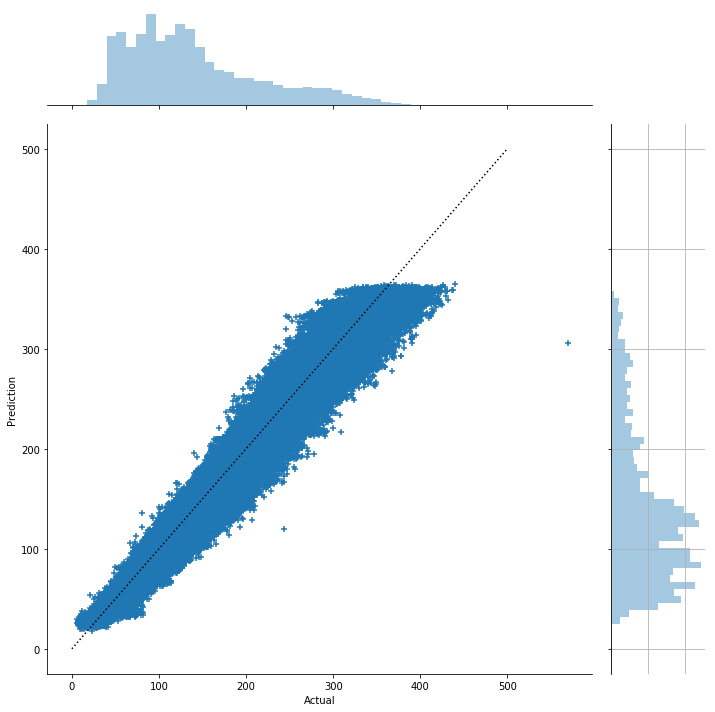

In [155]:
plt.figure(figsize=(10,8))
x_base=np.arange(0,500,10)
y_base=x_base
g = sns.jointplot(x='Actual', y='Prediction',marker="+", data=df,size=10, ratio=5)
g.ax_joint.plot(np.linspace(0, 500),
                np.linspace(0, 500), ':k')
plt.grid(True)
plt.show()

Text(0.5, 0.98, 'Airborne Attributes Correlation Heatmap')

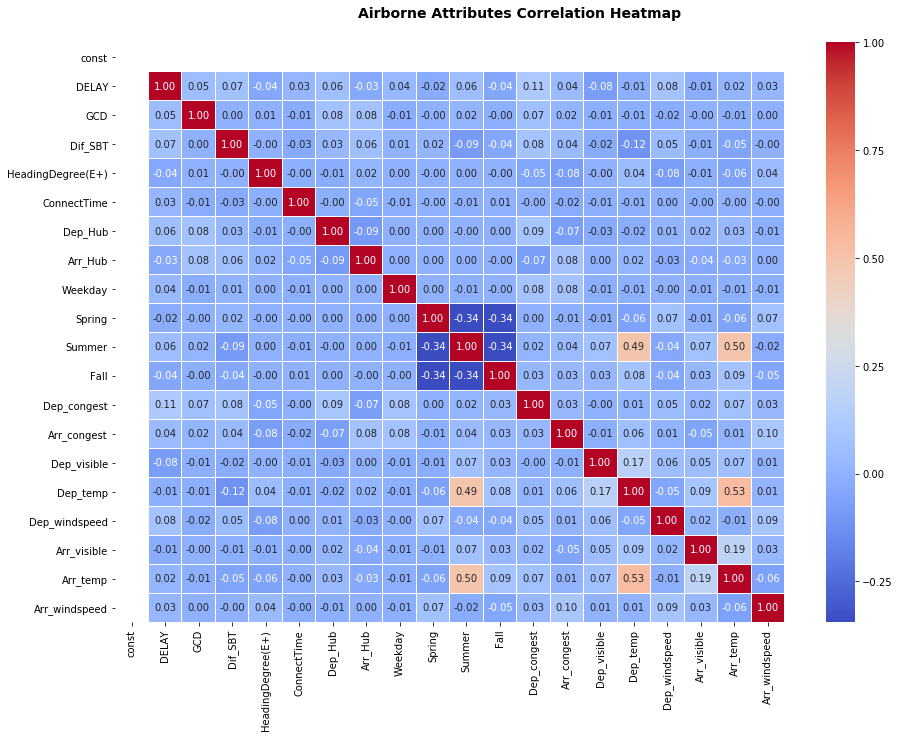

In [600]:
corr = X.corr()
fig, (ax) = plt.subplots(1, 1, figsize=(15,10))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Airborne Attributes Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

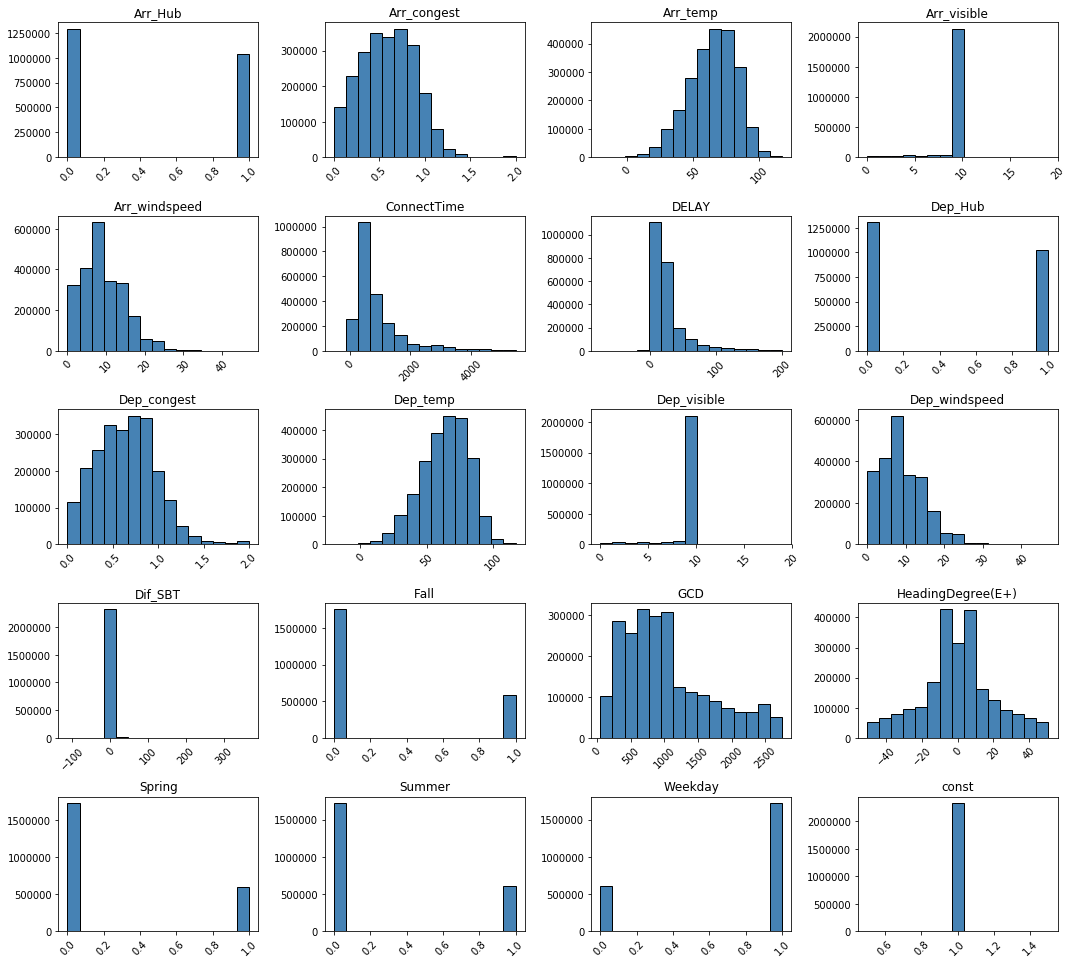

In [157]:
fig = X.hist(bins=15,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))   

In [158]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

In [404]:
rf = RandomForestRegressor()  
rf.fit(X, Y);

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
['DELAY','GCD','Dif_SBT','HeadingDegree(E+)','ConnectTime','Dep_Hub','Arr_Hub','T:0600-2000',
               'Weekday','Spring','Summer','Fall','Dep_congest','Arr_congest','Dep_visible',
               'Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed']

In [405]:
importance=rf.feature_importances_
importance1=list(importance[1:10])
importance2=list(importance[13:21])
importance3=[sum(importance[10:13])]
importance_new=importance1+importance2+importance3

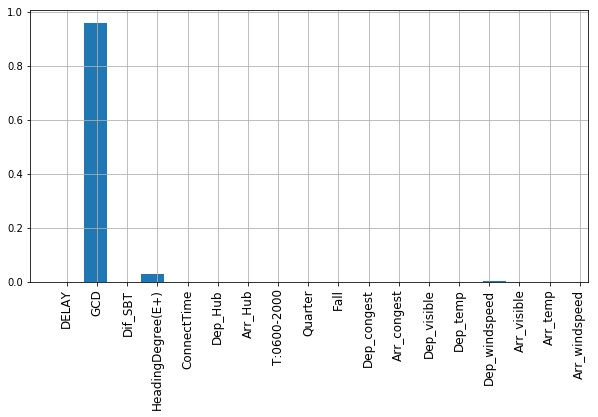

In [406]:
plt.figure(figsize=(10,5))
x=np.arange(0,len(importance_new))
plt.bar(x,importance_new)
plt.xticks(np.linspace(0,len(importance_new),len(importance_new)), ('DELAY','GCD','Dif_SBT','HeadingDegree(E+)','ConnectTime','Dep_Hub','Arr_Hub','T:0600-2000',
               'Quarter','Fall','Dep_congest','Arr_congest','Dep_visible',
               'Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed'),rotation=90,fontsize=12)
plt.grid(True)
plt.show()

In [407]:
for i, importance in zip(name, np.array(importance_new)):
    print(i, "=", importance)

DELAY = 0.001021365739188874
GCD = 0.9579228119632823
Dif_SBT = 0.0009891191407067218
HeadingDegree(E+) = 0.02983936646505399
ConnectTime = 0.0010243083295406667
Dep_Hub = 0.00015913136224581404
Arr_Hub = 0.0001244156874123286
T:0600-2000 = 8.51308607936864e-05
Weekday = 0.00015991434661531828
Spring = 0.0008734211409711214
Summer = 0.001087823655012483
Fall = 0.00021762606762733036
Dep_congest = 0.001554518318777747
Arr_congest = 0.0007853553509055391
Dep_visible = 0.00023460722897402107
Dep_temp = 0.0020035787246456614
Dep_windspeed = 0.0008215298150611803
Arr_visible = 0.0010959758031852758


In [408]:
indices = np.argsort(importance_new)

In [409]:
name_re=[name[0]]+name[2:19]
ipt_re=np.array(list(importance_new[0:1])+list(importance_new[2:16]))

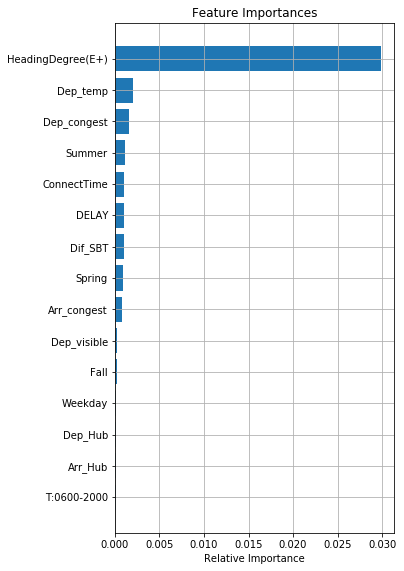

In [410]:

indices = np.argsort(ipt_re)

plt.figure(figsize=(5,10-10/16))
plt.title('Feature Importances')
plt.barh(range(len(indices)),ipt_re[indices], align='center')
plt.yticks(range(len(indices)), [name_re[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(True)
plt.show()

## Training and Testing

In [75]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(test_fill, test_size=0.3, random_state=42)

In [380]:
def error(X,Y,X_test,Y_test):
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    
    X_test = sm.add_constant(X_test)
    Y_predict = model.predict(X_test)
    return Y_predict


In [412]:
X = train[['DELAY','GCD','Dif_SBT','HeadingDegree(E+)','ConnectTime','Dep_Hub','Arr_Hub','T:0600-2000',
               'Weekday','Spring','Summer','Fall','Dep_congest','Arr_congest','Dep_visible',
               'Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed']] 
Y = train['A_air']# output variable (what we are trying to predict) #final

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
 
print_model = model.summary()
print(print_model)

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  A_air   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 5.502e+06
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:10:00   Log-Likelihood:            -6.0090e+06
No. Observations:             1649829   AIC:                         1.202e+07
Df Residuals:                 1649808   BIC:                         1.202e+07
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                21.3389      0.07

In [396]:
# original
name=['DELAY','GCD','Dif_SBT','HeadingDegree(E+)','ConnectTime','Dep_Hub','Arr_Hub','T:0600-2000',
               'Weekday','Spring','Summer','Fall','Dep_congest','Arr_congest','Dep_visible',
               'Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed']

X_test = val[name] 
X_test = sm.add_constant(X_test)
Y_test = val['A_air']
Fit=model.predict(X) 
Y_predict = model.predict(X_test) 
r2_score(Y_test,Y_predict) 


/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.9851963061439912

In [397]:
r2_score(Y,Fit) 


0.9852288169044563

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x360 with 0 Axes>

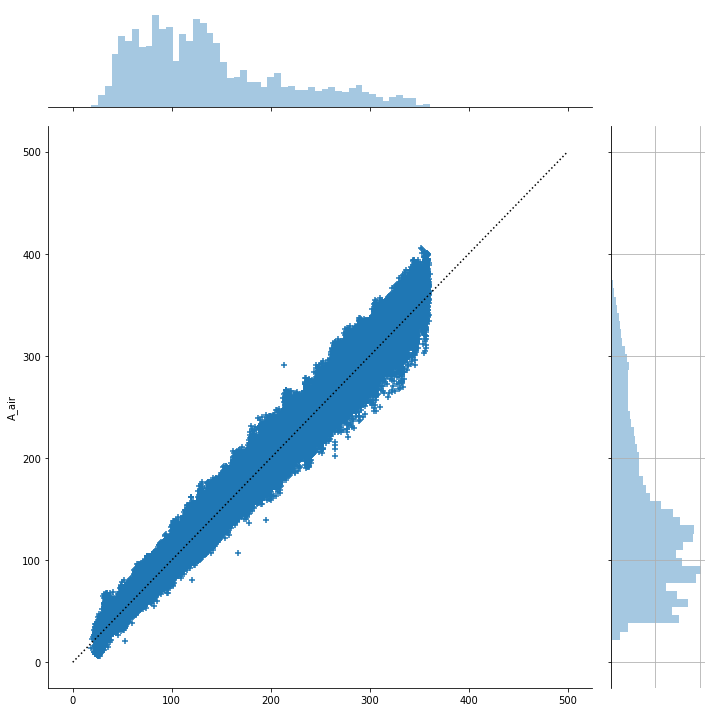

In [393]:
plt.figure(figsize=(6,5))
x_base=np.arange(0,500,10)
y_base=x_base
g = sns.jointplot(Y_predict, Y_test,marker="+",size=10, ratio=5)
g.ax_joint.plot(np.linspace(0, 500),
                np.linspace(0, 500), ':k')
plt.grid(True)
plt.show()

In [521]:
# dep% arr%
name=['DELAY','GCD','Dif_SBT','HeadingDegree(E+)','ConnectTime','Dep_Hub','Arr_Hub','Weekday','Spring','Summer','Fall',
           'Dep_visible','Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed',
            ]
X = train[name] 
Y = train['A_air']


X_test = val[name] 
Y_test = val['A_air']


Y_predict=error(X,Y,X_test,Y_test)
erro_cap=mean_squared_error(Y_predict,Y_test)
r2_score(Y_test,Y_predict) 

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.9867199340426406

In [522]:
# heading
name=['DELAY','GCD','Dif_SBT','ConnectTime','Dep_Hub','Arr_Hub','Weekday','Spring','Summer','Fall',
               'Dep_congest','Arr_congest',
           'Dep_visible','Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed',
            ]
X = train[name] 
Y = train['A_air']


X_test = val[name] 
Y_test = val['A_air']


Y_predict=error(X,Y,X_test,Y_test)
error_heading=mean_squared_error(Y_predict,Y_test)
r2_score(Y_test,Y_predict)

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.9694227498311069

In [524]:
# sbt_dif
name=test_fill[['DELAY','GCD','Dif_SBT','HeadingDegree(E+)','ConnectTime','Dep_Hub','Arr_Hub','T:0600-2000',
               'Weekday','Spring','Summer','Fall','Dep_congest','Arr_congest','Dep_visible',
               'Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed',
            ]]
X = train[name] 
Y = train['A_air']

X_test = val[name] 
Y_test = val['A_air']

Y_predict=error(X,Y,X_test,Y_test)
#mean_squared_error(Y_predict,Y_test)


Y_predict=error(X,Y,X_test,Y_test)
error_sbt=mean_squared_error(Y_predict,Y_test)
r2_score(Y_test,Y_predict)

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.9857408445244945

In [523]:
# original
name=['DELAY','GCD','Dif_SBT','HeadingDegree(E+)','Dep_Hub','Arr_Hub','Weekday','Spring','Summer','Fall',
               'Dep_congest','Arr_congest',
           'Dep_visible','Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed',
            ]
X = train[name] 
Y = train['A_air']


X_test = val[name] 
Y_test = val['A_air']

Y_predict=error(X,Y,X_test,Y_test)
error_CT=mean_squared_error(Y_predict,Y_test)
r2_score(Y_test,Y_predict)

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.9867576079021455

In [525]:
# weather
name=['DELAY','GCD','HeadingDegree(E+)','ConnectTime','Dep_Hub','Arr_Hub','Weekday','Spring','Summer','Fall',
               'Dep_congest','Arr_congest',
            ]
X = train[name] 
Y = train['A_air']

X_test = val[name] 
Y_test = val['A_air']

Y_predict=error(X,Y,X_test,Y_test)
#mean_squared_error(Y_predict,Y_test)


Y_predict=error(X,Y,X_test,Y_test)
error_weather=mean_squared_error(Y_predict,Y_test)
r2_score(Y_test,Y_predict)

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.9856025247170674

In [526]:
# segmented
name=['DELAY','GCD','HeadingDegree(E+)','ConnectTime','Dep_Hub','Arr_Hub','Weekday','Spring','Summer','Fall',
               'Dep_congest','Arr_congest',
           'Dep_visible','Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed',
            ]
low = 700
up=2200

X = train[name][(train['GCD']<=low)]
Y = train['A_air'][(train['GCD']<=low)]
X_test = val[name][(val['GCD']<=low)]
Y_test = val['A_air'][(val['GCD']<=low)]

Y_predict=error(X,Y,X_test,Y_test)
error1 = Y_predict-Y_test

X = train[name][(train['GCD']>low)&(train['GCD']<up)]
Y = train['A_air'][(train['GCD']>low)&(train['GCD']<up)]
X_test = val[name][(val['GCD']>low)&(val['GCD']<up)]
Y_test = val['A_air'][(val['GCD']>low)&(val['GCD']<up)]

Y_predict=error(X,Y,X_test,Y_test)
error2 = Y_predict-Y_test

X = train[name][(train['GCD']>=up)]
Y = train['A_air'][(train['GCD']>=up)]
X_test = val[name][(val['GCD']>=up)]
Y_test = val['A_air'][(val['GCD']>=up)]

Y_predict=error(X,Y,X_test,Y_test)
error3 = Y_predict-Y_test

total_error=list(error1)+list(error2)+list(error3)
error_seg=np.mean(np.array(total_error)**2)
r2_score(Y_test,Y_predict)

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8152200864397069

In [482]:
errors=np.array([error_o,error_heading,erro_cap,error_sbt,error_weather,error_seg,error_CT])

In [251]:
len(train)

1631238

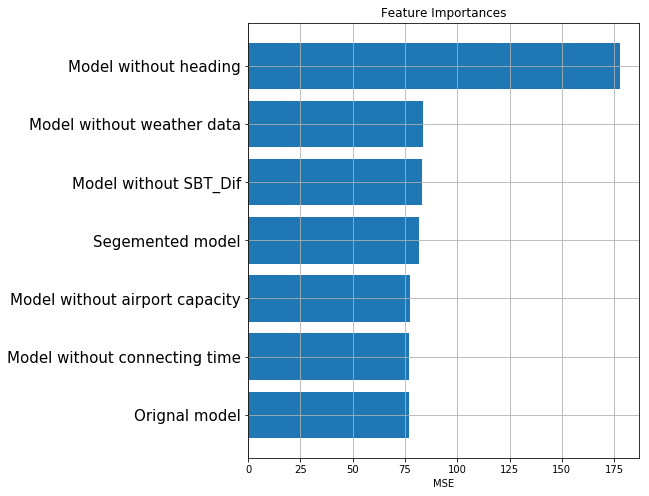

In [483]:
models = ['Orignal model','Model without heading', 'Model without airport capacity', 
          'Model without SBT_Dif', 'Model without weather data', 'Segemented model',
          'Model without connecting time']


indices = np.argsort(errors)

plt.figure(figsize=(7,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)),errors[indices], align='center')
plt.yticks(range(len(indices)), [models[i] for i in indices],fontsize=15)
plt.xlabel('MSE')
plt.grid(True)
plt.show()

In [ ]:
# log normal
name=['DELAY','GCD','HeadingDegree(E+)','ConnectTime','Dep_Hub','Arr_Hub','Weekday','Spring','Summer','Fall',
               'Dep_congest','Arr_congest',
           'Dep_visible','Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed',
            ]
X = train[name] 
Y = train['A_air'].agg(lambda x: np.log(x))


X_test = val[name] 
Y_test = val['A_air'].agg(lambda x: np.log(x))


Y_predict=error(X,Y,X_test,Y_test)
mean_squared_error(Y_predict.agg(lambda x: np.exp(x)),Y_test.agg(lambda x: np.exp(x)))

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

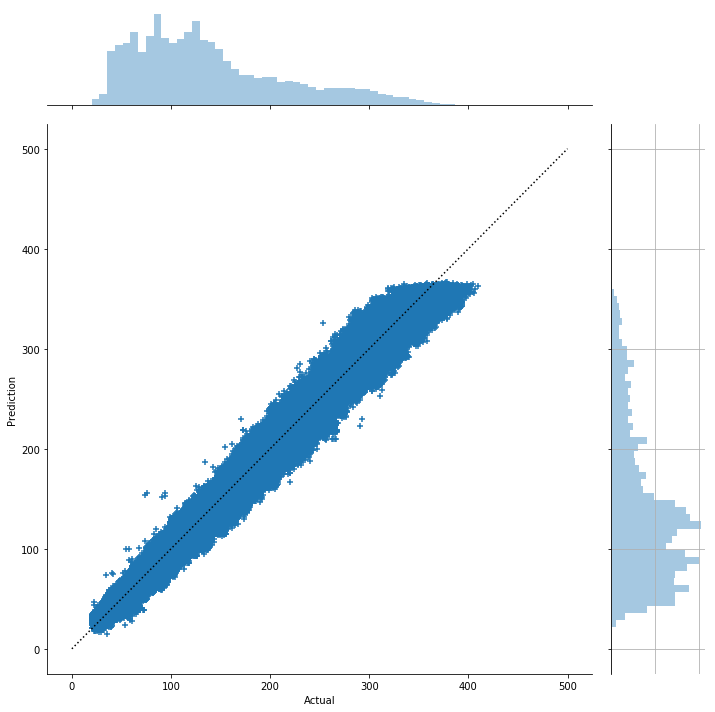

In [338]:
plt.figure(figsize=(10,8))
x_base=np.arange(0,500,10)
y_base=x_base
g = sns.jointplot(x='Actual', y='Prediction',marker="+", data=df,size=10, ratio=5)
g.ax_joint.plot(np.linspace(0, 500),
                np.linspace(0, 500), ':k')
plt.grid(True)
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

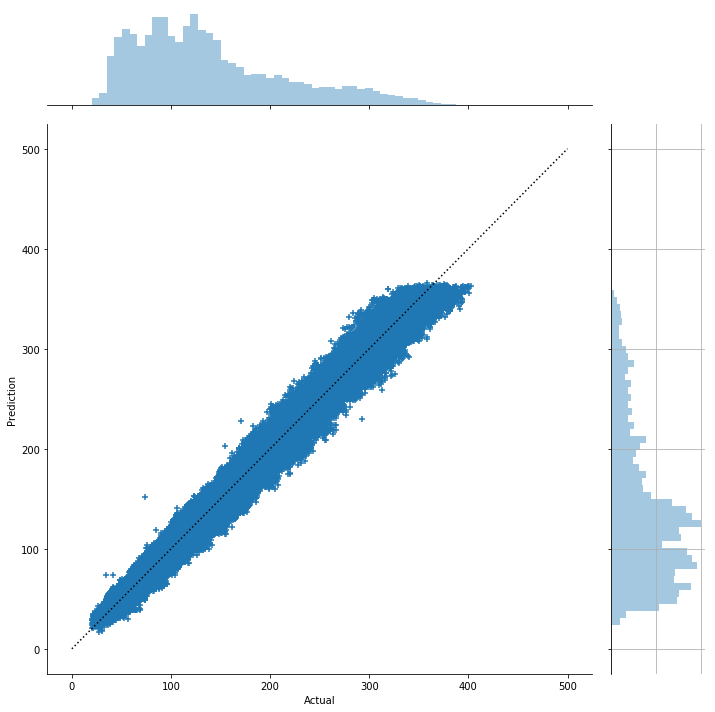

In [145]:
plt.figure(figsize=(10,8))
x_base=np.arange(0,500,10)
y_base=x_base
g = sns.jointplot(x='Actual', y='Prediction',marker="+", data=df_test,size=10, ratio=5)
g.ax_joint.plot(np.linspace(0, 500),
                np.linspace(0, 500), ':k')
plt.grid(True)
plt.show()

In [133]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_predict)  

0.9867606746033772

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [78]:
# regression tree

X = train[['DELAY','GCD','HeadingDegree(E+)']] 
Y = train['A_air']

rf = RandomForestRegressor()  
rf.fit(X, Y);

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [399]:
X_test = val[name] 
Y_test = val['A_air']


predictions0 = rf.predict(X)
predictions1 = rf.predict(X_test)

In [400]:
r2_score(predictions0,Y)

0.998444211076061

In [401]:
r2_score(predictions1,Y_test)

0.991323533959712

In [79]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [80]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

KeyboardInterrupt: 

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [229]:
r2_score(predictions0,Y)

0.9980965533927838

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x360 with 0 Axes>

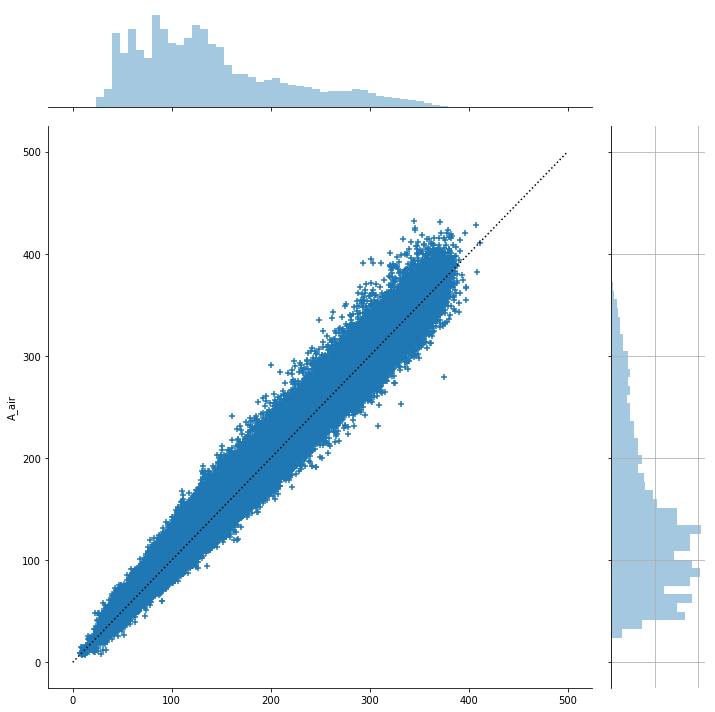

In [231]:
plt.figure(figsize=(6,5))
x_base=np.arange(0,500,10)
y_base=x_base
g = sns.jointplot(predictions1, Y_test,marker="+",size=10, ratio=5)
g.ax_joint.plot(np.linspace(0, 500),
                np.linspace(0, 500), ':k')
plt.grid(True)
plt.show()

## Model for dif_SBT

In [ ]:
#two group instrumental variables for endogenous variable dif_sbt.
#(1) gcd, carrier, a.c. type, quarter, weekday, original and destination airport;
#(2) OD pair, carrier, a.c. type, quarter, weekday and original and destination airport.

In [87]:
sbt=test_fill[['GCD','Airline','Dep','Arr','T:0600-2000',#'DEP_YYYYMM',#'GCD',#'Aircraft','HeadingDegree(E+)' ,'Aircraft'
                'Spring','Summer','Fall','Weekday','Dif_SBT'
                   #'Dep_visible','Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed','Dep_congest','Arr_congest','Weekday'
                #'A_air','DELAY','Dif_SBT','ConnectTime'
              ]]

In [88]:
sbt['Month']=sbt['DEP_YYYYMM'].agg(lambda x: str(x)[-2:])
sbt=sbt.drop(columns=['DEP_YYYYMM'])
# airline
airline=sbt['Airline'].value_counts().to_frame().reset_index(drop=False).rename(index=str, columns={"index": "Airline", "Airline": "Operations"})
topairline=list(airline.iloc[:31,:]['Airline'])
sbt=sbt[sbt['Airline'].isin(topairline)]
# OD pairs
#sbt['OD_Pair']=sbt['Dep']+'-'+sbt['Arr']

KeyError: 'DEP_YYYYMM'

In [91]:
sbt=ohe_fireplace_qu(list(sbt['Dep'].unique()),sbt,'Dep','Dep')
sbt=ohe_fireplace_qu(list(sbt['Arr'].unique()),sbt,'Arr','Arr')
#sbt=ohe_fireplace_qu(list(sbt['OD_Pair'].unique()),sbt,'OD_Pair','OD')
sbt=ohe_fireplace_qu(list(sbt['Airline'].unique()),sbt,'Airline','Airline')
#sbt=ohe_fireplace_qu(list(sbt['Month'].unique()),sbt,'Month','M')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1]:
list(sbt.columns)

NameError: name 'sbt' is not defined

In [2]:
Xs =sbt.drop(columns=['Dif_SBT'])
Ys =sbt['Dif_SBT']

NameError: name 'sbt' is not defined

In [96]:
Xs.iloc[0]

GCD            1961.40438
T:0600-2000       1.00000
Spring            0.00000
Summer            1.00000
Fall              0.00000
Weekday           1.00000
Dep_BWI           0.00000
Dep_DCA           0.00000
Dep_DFW           0.00000
Dep_EWR           0.00000
Dep_LAX           0.00000
Dep_LGA           0.00000
Dep_MSP           0.00000
Dep_ORD           0.00000
Dep_PHL           0.00000
Dep_SFO           0.00000
Dep_BOS           0.00000
Dep_CLT           0.00000
Dep_DTW           0.00000
Dep_IAH           0.00000
Dep_LAS           0.00000
Dep_MEM           0.00000
Dep_PHX           0.00000
Dep_SEA           0.00000
Dep_FLL           0.00000
Dep_SLC           0.00000
Dep_MCO           0.00000
Dep_IAD           0.00000
Dep_DEN           0.00000
Dep_SAN           0.00000
Dep_TPA           0.00000
Dep_MIA           0.00000
Dep_JFK           0.00000
Dep_MDW           0.00000
Arr_DEN           0.00000
Arr_CLT           0.00000
Arr_JFK           0.00000
Arr_MIA           0.00000
Arr_PHX     

In [ ]:
# with statsmodels
Xs = sm.add_constant(Xs) # adding a constant
 
model = sm.OLS(Ys, Xs).fit()
#predictions = model.predict(X1) 
 
print_model = model.summary()
print(print_model)

## Lognormal Model _01

In [232]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(test_fill, test_size=0.1, random_state=42)

In [254]:
#refine the dataset
logtest=test_fill[['A_air','Airline','Dep','Arr','DEP_YYYYMM',#'GCD',#'Aircraft','HeadingDegree(E+)' 
                   'DELAY','Dif_SBT','ConnectTime',#'Dep_Hub','Arr_Hub', 
                   'Dep_visible','Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed',
                   'Dep_congest','Arr_congest','Weekday']]

In [255]:
#month
logtest['Month']=logtest['DEP_YYYYMM'].agg(lambda x: str(x)[-2:])
logtest=logtest.drop(columns=['DEP_YYYYMM'])
# airline
airline=logtest['Airline'].value_counts().to_frame().reset_index(drop=False).rename(index=str, columns={"index": "Airline", "Airline": "Operations"})
topairline=list(airline.iloc[:31,:]['Airline'])
logtest=logtest[logtest['Airline'].isin(topairline)]
# OD pairs
logtest['OD_Pair']=logtest['Dep']+'-'+logtest['Arr']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [90]:
# get dummy
def ohe_fireplace_qu(cats,data,column,rename):
    
    cat_type = CategoricalDtype(categories=cats)
    data.loc[:, column] = data.loc[:, column].astype(cat_type)
    data = pd.get_dummies(data,
                          prefix=rename,
                          columns=[column], 
                          drop_first=True)
    
    return data

In [257]:
# OD, O, D, Carriers, Quater, Weekday
logtest=ohe_fireplace_qu(list(logtest['Dep'].unique()),logtest,'Dep','Dep')
logtest=ohe_fireplace_qu(list(logtest['Arr'].unique()),logtest,'Arr','Arr')
logtest=ohe_fireplace_qu(list(logtest['OD_Pair'].unique()),logtest,'OD_Pair','OD')
logtest=ohe_fireplace_qu(list(logtest['Airline'].unique()),logtest,'Airline','Airline')
logtest=ohe_fireplace_qu(list(logtest['Month'].unique()),logtest,'Month','M')

In [259]:
## regression model 
X=logtest.drop(columns=['A_air'])
Y=logtest['A_air'].agg(lambda x: np.log(x))

In [261]:
model = linear_model.LinearRegression(fit_intercept=True)
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [262]:
model.score(X, Y)

0.9867588729924646

In [263]:
model.intercept_

5.398425919154247

In [265]:
coef=model.coef_

In [266]:
result=coef[0:12]
name=['DELAY','Dif_SBT','ConnectTime','Dep_visible','Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed',
                   'Dep_congest','Arr_congest','Weekday']

In [267]:
d = {'col1': name, 'col2': result}
df = pd.DataFrame(data=d)
df

,col1,col2
0,DELAY,-1.868747e-05
1,Dif_SBT,1.065251e-03
2,ConnectTime,1.677683e-07
3,Dep_visible,-2.392227e-04
4,Dep_temp,-8.712394e-05
5,Dep_windspeed,4.033269e-04
6,Arr_visible,-3.995964e-03
7,Arr_temp,-6.987531e-06
8,Arr_windspeed,7.839980e-04
9,Dep_congest,-2.801425e-03


In [290]:
X.iloc[0]

DELAY             27.000000
Dif_SBT            3.000000
ConnectTime      272.100000
Dep_visible       10.000000
Dep_temp          65.000000
Dep_windspeed      5.000000
Arr_visible       10.000000
Arr_temp          82.000000
Arr_windspeed     10.000000
Dep_congest        0.740741
Arr_congest        0.315789
Weekday            0.000000
Dep_BOS            0.000000
Dep_CLT            0.000000
Dep_DFW            0.000000
Dep_DTW            0.000000
Dep_IAH            0.000000
Dep_LAS            0.000000
Dep_LAX            0.000000
Dep_LGA            0.000000
Dep_MEM            0.000000
Dep_ORD            0.000000
Dep_PHL            0.000000
Dep_PHX            0.000000
Dep_SEA            0.000000
Dep_SFO            0.000000
Dep_FLL            0.000000
Dep_BWI            0.000000
Dep_SLC            0.000000
Dep_MCO            0.000000
Dep_IAD            0.000000
Dep_DEN            0.000000
Dep_MSP            0.000000
Dep_DCA            0.000000
Dep_SAN            0.000000
Dep_TPA            0

In [294]:
feature_list = list(X.columns)
n=len(feature_list)-20
print(feature_list[n],coef[n])

Airline_SCX -0.0016985526095826295


In [295]:
coef=model.coef_

## Lognormal Model _02

In [68]:
logtest=test_fill[['GCD','Dif_SBT','Airline','Dep','Arr','T:0600-2000',#'Aircraft' 
                   'Spring','Summer','Fall','Weekday']]

In [69]:
# airline
airline=logtest['Airline'].value_counts().to_frame().reset_index(drop=False).rename(index=str, columns={"index": "Airline", "Airline": "Operations"})
topairline=list(airline.iloc[:31,:]['Airline'])
logtest=logtest[logtest['Airline'].isin(topairline)]

In [70]:
# get dummy
def ohe_fireplace_qu(cats,data,column,rename):
    
    cat_type = CategoricalDtype(categories=cats)
    
    data.loc[:, column] = data.loc[:, column].astype(cat_type)
    data = pd.get_dummies(data,
                          prefix=rename,
                          columns=[column], 
                          drop_first=True)
    
    return data

In [71]:
logtest=ohe_fireplace_qu(list(logtest['Dep'].unique()),logtest,'Dep','Dep')
logtest=ohe_fireplace_qu(list(logtest['Arr'].unique()),logtest,'Arr','Arr')
logtest=ohe_fireplace_qu(list(logtest['Airline'].unique()),logtest,'Airline','Airline')

In [72]:
X=logtest.drop(columns=['Dif_SBT'])
Y=logtest['Dif_SBT']

In [73]:
# with statsmodels
X1 = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X1).fit()
predictions = model.predict(X1) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Dif_SBT   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     354.3
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:29:14   Log-Likelihood:            -6.9805e+06
No. Observations:             2348824   AIC:                         1.396e+07
Df Residuals:                 2348731   BIC:                         1.396e+07
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.9263      0.122    -15.813      

### segmented function


In [378]:
seg=test_fill[(test_fill['GCD']<=800)]
#seg=test_fill[(test_fill['GCD']<1600)&(test_fill['GCD']>800)]
#seg=test_fill[test_fill['GCD']>=1600]

X = seg[['DELAY','GCD','Dif_SBT','HeadingDegree(E+)','ConnectTime','Dep_Hub','Arr_Hub','T:0600-2000','Weekday','Spring','Summer','Fall',
               'Dep_congest','Arr_congest',#'Winter' base
           'Dep_visible','Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed']] 
Y = seg['A_air']

X = sm.add_constant(X) # adding a constant
 
model= sm.OLS(Y, X).fit()
#predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  A_air   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 5.551e+05
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:40:55   Log-Likelihood:            -3.2980e+06
No. Observations:             1000675   AIC:                         6.596e+06
Df Residuals:                 1000654   BIC:                         6.596e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                19.6090      0.06

In [504]:
# defined delay
seg=test_fill

In [505]:
up=1600
low=800

In [506]:
# ORIGIN GCD
#seg['GCD_short']=seg['GCD']*(seg['GCD']<=800).astype(int)+800*(1-(seg['GCD']<=800).astype(int))
#seg['GCD_long']=seg['GCD']*(seg['GCD']>=1600).astype(int)-1600*(seg['GCD']>=1600).astype(int)
#seg['GCD_median']=seg['GCD']*((seg['GCD']>800) & (seg['GCD']<1600)).astype(int)-800*(1-(seg['GCD']<=800).astype(int))+800*((seg['GCD']>=1600).astype(int))
seg['GCD_short']=seg['GCD']*(seg['GCD']<=low).astype(int)
seg['GCD_long']=seg['GCD']*(seg['GCD']>=up).astype(int)
seg['GCD_median']=seg['GCD']*((seg['GCD']>low) & (seg['GCD']<up)).astype(int)
# Delay
seg['DELAY_short']=seg['DELAY']*(seg['GCD']<=low).astype(int)
seg['DELAY_long']=seg['DELAY']*(seg['GCD']>=up).astype(int)
seg['DELAY_median']=seg['DELAY']*((seg['GCD']>low) & (seg['GCD']<up)).astype(int)
#Difference SBT
seg['Dif_SBT_short']=seg['Dif_SBT']*(seg['GCD']<=low).astype(int)
seg['Dif_SBT_long']=seg['Dif_SBT']*(seg['GCD']>=up).astype(int)
seg['Dif_SBT_median']=seg['Dif_SBT']*((seg['GCD']>low) & (seg['GCD']<up)).astype(int)
# Dep_hub
seg['Dep_Hub_short']=seg['Dep_Hub']*(seg['GCD']<=low).astype(int)
seg['Dep_Hub_long']=seg['Dep_Hub']*(seg['GCD']>=up).astype(int)
seg['Dep_Hub_median']=seg['Dep_Hub']*((seg['GCD']>low) & (seg['GCD']<up)).astype(int)
# Arr_hub
seg['Arr_Hub_short']=seg['Arr_Hub']*(seg['GCD']<=low).astype(int)
seg['Arr_Hub_long']=seg['Arr_Hub']*(seg['GCD']>=up).astype(int)
seg['Arr_Hub_median']=seg['Arr_Hub']*((seg['GCD']>low) & (seg['GCD']<up)).astype(int)
#Dep_cap
seg['Dep%_short']=seg['Dep%']*(seg['GCD']<=low).astype(int)
seg['Dep%_long']=seg['Dep%']*(seg['GCD']>=up).astype(int)
seg['Dep%_median']=seg['Dep%']*((seg['GCD']>low) & (seg['GCD']<up)).astype(int)
# Arr_cap
seg['Arr%_short']=seg['Arr%']*(seg['GCD']<=low).astype(int)
seg['Arr%_long']=seg['Arr%']*(seg['GCD']>=up).astype(int)
seg['Arr%_median']=seg['Arr%']*((seg['GCD']>low) & (seg['GCD']<up)).astype(int)
# constant
seg['const_short']=np.ones([len(seg)])*(seg['GCD']<=low).astype(int)
seg['const_long']=np.ones([len(seg)])*(seg['GCD']>=up).astype(int)
seg['const_median']=np.ones([len(seg)])*((seg['GCD']>low) & (seg['GCD']<up)).astype(int)

In [580]:
X = seg[['const_short','const_median','const_long','DELAY_short','DELAY_median','DELAY_long',
         'GCD_short','GCD_median','GCD_long','Dif_SBT_short','Dif_SBT_median','Dif_SBT_long',
         'ConnectTime','HeadingDegree(E+)',
         'Dep_Hub_short','Dep_Hub_median','Dep_Hub_long','Arr_Hub_short','Arr_Hub_median','Arr_Hub_long',
         'Weekday','Spring','Summer','Fall', #'Winter' base
           'Dep_visible','Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed',
            'Dep%_short','Dep%_median','Dep%_long','Arr%_short','Arr%_median','Arr%_long']] # here we have 2 input variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
            #'Dep%','Arr%'
Y = seg['A_air']# output variable (what we are trying to predict)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)

# with statsmodels
#X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  A_air   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 2.863e+05
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:58:15   Log-Likelihood:            -1.4587e+06
No. Observations:              378187   AIC:                         2.918e+06
Df Residuals:                  378167   BIC:                         2.918e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const_short        9.446e-14   1.43e-1

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [683]:
regr.score(X, Y, sample_weight=None)

0.9349944882081745

In [509]:
df = pd.DataFrame(columns = ['Actual', 'Prediction'])
df['Actual'] =  v['A_air']
df['Prediction'] = predictions
df['Diff']=df['Prediction']-df['Actual']
df['Diff'].describe()

count    1.893579e+06
mean     1.320616e-11
std      8.638454e+00
min     -8.062820e+01
25%     -5.024379e+00
50%      4.261749e-01
75%      5.445814e+00
max      1.183587e+02
Name: Diff, dtype: float64

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

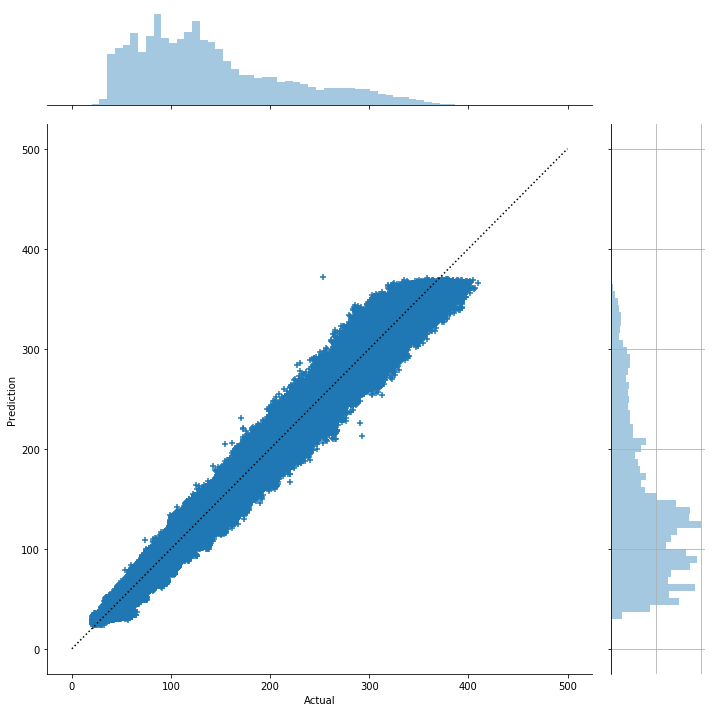

In [510]:
plt.figure(figsize=(10,8))
x_base=np.arange(0,500,10)
y_base=x_base
g = sns.jointplot(x='Actual', y='Prediction',marker="+", data=df,size=10, ratio=5)
g.ax_joint.plot(np.linspace(0, 500),
                np.linspace(0, 500), ':k')
plt.grid(True)
plt.show()

## TESTING ON GROUP

In [528]:
test_fill.T

,0,1,2,3,4,5,6,7,8,9,...,1893569,1893570,1893571,1893572,1893573,1893574,1893575,1893576,1893577,1893578
FLTNO,0,0,0,0,0,0,0,0,0,0,...,780,782,782,783,789,792,794,794,794,615
Airline,NA,NA,US,US,US,US,US,US,US,US,...,XOJ,XOJ,XOJ,XOJ,XOJ,XOJ,XOJ,XOJ,XOJ,XRO
Aircraft,B739,B753,,,,,,,,,...,C750,C750,C750,C750,C750,C750,C750,C750,C750,F900
DEP_YYYYMM,201602,201608,201603,201608,201606,201606,201603,201608,201608,201607,...,201604,201606,201611,201609,201611,201605,201604,201606,201604,201601
DEP_DAY,9,5,27,17,3,4,10,28,29,21,...,25,12,8,27,17,24,21,1,20,20
DEP_HOUR,19,17,18,17,16,15,9,9,12,20,...,22,19,14,16,13,22,19,12,17,19
DEP_QTR,4,4,1,4,1,4,3,1,4,4,...,3,3,1,4,2,3,4,4,2,1
ARR_YYYYMM,201602,201608,201603,201608,201606,201606,201603,201608,201608,201607,...,201604,201606,201611,201609,201611,201605,201604,201606,201604,201601
ARR_DAY,9,5,27,17,3,4,10,28,29,21,...,25,12,8,28,17,24,21,1,20,21
ARR_QTR,3,4,3,4,2,2,1,4,2,4,...,4,4,4,1,3,4,4,3,2,1


In [539]:
airline=test_fill['Airline'].value_counts().to_frame()#.index.values.tolist()
airline=airline[airline['Airline']>=300].index.values.tolist()

In [540]:
groups=test_fill[test_fill['Airline'].isin(airline)]

In [555]:
g1=groups[groups['Spring']==1]
g1['quater']='Spring'
g2=groups[groups['Summer']==1]
g2['quater']='Summer'
g3=groups[groups['Fall']==1]
g3['quater']='Fall'
g4=groups[groups['Winter']==1]
g4['quater']='Winter'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [558]:
GROUP=pd.concat([g1, g2,g3,g4])

In [728]:
const=[]
coeff=[]
actual=[]
predt=[]
weight=[]
R_sq=[]

In [729]:
def regression(testing):
    X = testing[['DELAY','Dif_SBT','ConnectTime',
           'Dep_visible','Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed',
            'Dep%','Arr%']] # here we have 2 input variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
            #'Dep%','Arr%'
    Y = testing['ln_air']# output variable (what we are trying to predict)
    global i
    # with sklearn
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    weight.append(len(Y))
    const.append(regr.intercept_)
    coeff.append(regr.coef_)
    if len(Y<50):
        R_sq.append(0)
    else:
        R_sq.append(regr.score(X, Y, sample_weight=None))
    model = sm.OLS(Y, X).fit()
    actual.extend(list(Y))
    predt.extend(model.predict(X))

In [730]:
GROUP.groupby(['Airline','Dep','Arr','quater','Weekday']).apply(regression)

""


In [713]:
len(weight)

16592

In [731]:
d = {'weight': weight, 'const':const,'coeff':coeff,'R_sq':R_sq}
df = pd.DataFrame(data=d)

In [742]:
LOW=QQ1(result['const'])
UP=QQ2(result['const'])

In [744]:
result=df[(df['const']<UP)&(df['const']>LOW)]

In [748]:
# mean constant
sum(result['const']*result['weight'])/sum(result['weight'])

4.827120077918985

In [749]:
sum(result['coeff']*result['weight'])/sum(result['weight'])

array([-1.05775023e-04,  8.14165997e-04, -8.20256827e-07, -4.63786508e-04,
        1.37238558e-04,  4.75045915e-05, -2.82089499e-03, -4.13560516e-04,
        7.10756544e-04,  3.34707716e-04,  2.76270664e-02])

## Segmented regression
Piecewise Linear Regression Models

In [92]:
test['A_air'].describe()

count    2.378332e+06
mean     1.378358e+02
std      7.598243e+01
min      6.000000e+00
25%      8.100000e+01
50%      1.220000e+02
75%      1.780000e+02
max      5.690000e+02
Name: A_air, dtype: float64

In [283]:
#seg=test_fill[(test_fill['GCD']<1600)&(test['GCD']>800)]
#seg=test_fill[(test_fill['GCD']<=800)]
seg=test_fill[test_fill['GCD']>=1600] 
len(seg)

378193

In [444]:
#<700
seg=test[(test['GCD']<=700)]
seg['A_air'].describe()

count    895871.000000
mean         69.103183
std          20.722725
min           6.000000
25%          52.000000
50%          69.000000
75%          86.000000
max         142.000000
Name: A_air, dtype: float64

In [445]:
# 700-2200
seg=test[(test['GCD']<2200)&(test['GCD']>700)]
seg['A_air'].describe()

count    1.268760e+06
mean     1.589923e+02
std      4.609011e+01
min      7.800000e+01
25%      1.240000e+02
50%      1.460000e+02
75%      1.900000e+02
max      3.370000e+02
Name: A_air, dtype: float64

In [448]:
# >2200
seg=test[(test['GCD']>=2200)] 
seg['A_air'].describe()

count    213701.000000
mean        300.366526
std          31.020262
min         214.000000
25%         277.000000
50%         298.000000
75%         322.000000
max         569.000000
Name: A_air, dtype: float64

In [141]:
#seg=test_fill[(test_fill['GCD']<1600)&(test_fill['GCD']>800)]
#seg=test_fill[(test_fill['GCD']<=800)]
seg=test_fill[(test_fill['GCD']>=1600)] 
len(seg)

378187

In [582]:
#seg=test_fill[(test_fill['GCD']<1600)&(test_fill['GCD']>800)]
#seg=test_fill[(test_fill['GCD']<=800)]
seg=test_fill[test_fill['GCD']>=1600]

X = seg[['DELAY','GCD','Dif_SBT','HeadingDegree(E+)','ConnectTime','Dep_Hub','Arr_Hub','Weekday','Spring','Summer','Fall',
               'Dep_congest','Arr_congest',#'Winter' base
           'Dep_visible','Dep_temp','Dep_windspeed','Arr_visible','Arr_temp','Arr_windspeed']] 
Y = seg['A_air']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  A_air   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 1.653e+05
Date:                Tue, 23 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:09:12   Log-Likelihood:            -1.9650e+06
No. Observations:              463340   AIC:                         3.930e+06
Df Residuals:                  463320   BIC:                         3.930e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                22.4230      0.30

In [1278]:
# make the prediction
df3 = pd.DataFrame(columns = ['Actual', 'Prediction'])
df3['Actual'] = seg['A_air']
df3['Prediction'] = predictions
df3['Diff']=df3['Prediction']-df3['Actual']
df3['Diff'].describe()

count    1.268760e+06
mean     1.328223e-12
std      1.023769e+01
min     -1.005254e+03
25%     -6.284810e+00
50%      2.771406e-01
75%      6.613456e+00
max      1.098179e+02
Name: Diff, dtype: float64

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0, 400)

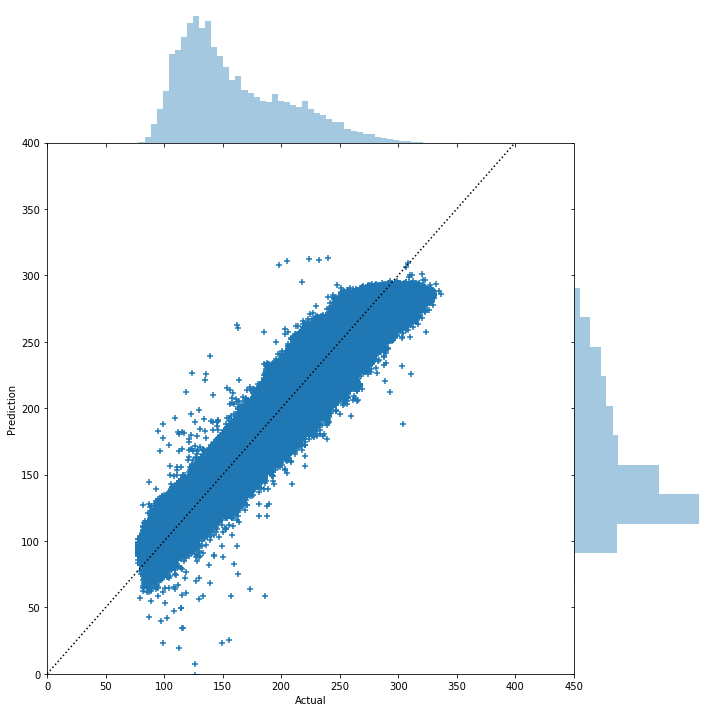

In [1279]:
jp = sns.jointplot(x='Actual', y='Prediction', data=df3,marker="+",
                   space=0, size=10, ratio=4)
jp.ax_joint.plot(np.linspace(0, 500),
                np.linspace(0, 500), ':k')
jp.ax_marg_x.set_xlim(0,450)
jp.ax_marg_y.set_ylim(0,400)


In [879]:
ddf1=df3

In [885]:
ddf2=df3

In [892]:
ddf3=df3

In [893]:
len(df3) #387151 // 321647//139694

123956

In [895]:
frames = [ddf1, ddf2, ddf3]
result = pd.concat(frames)

In [896]:
len(result)

848492

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


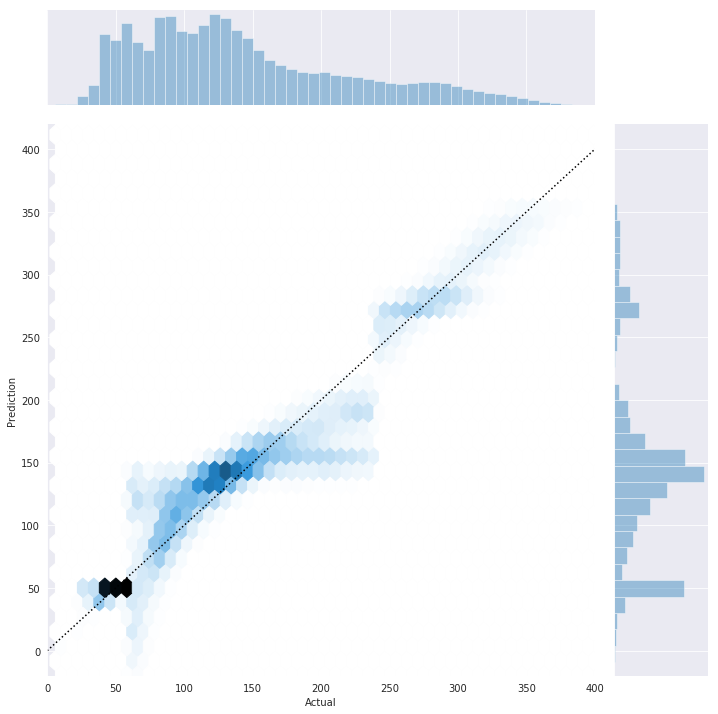

In [913]:
with sns.axes_style('darkgrid'):
    joint_kws=dict(gridsize=50)
    g = sns.jointplot(x='Actual', y='Prediction', data=result,kind='hex', joint_kws= joint_kws,size=10, ratio=5)
    g.ax_joint.plot(np.linspace(0, 500),
                np.linspace(0, 500), ':k')
    g.ax_marg_x.set_xlim(0,400)
    g.ax_marg_y.set_ylim(-20,420)

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


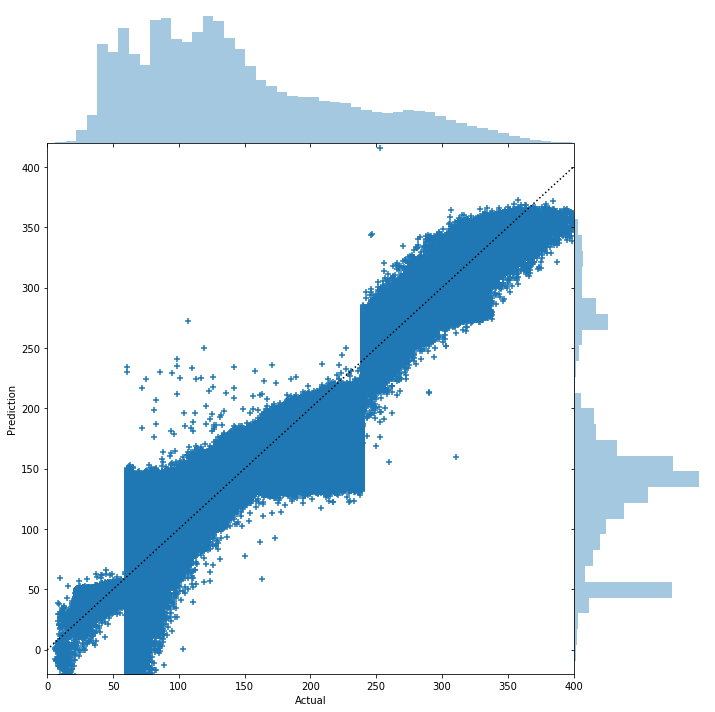

In [898]:
jp = sns.jointplot(x='Actual', y='Prediction', data=result,marker="+",
                   space=0, size=10, ratio=4)
jp.ax_joint.plot(np.linspace(0, 500),
                np.linspace(0, 500), ':k')
jp.ax_marg_x.set_xlim(0,400)
jp.ax_marg_y.set_ylim(-20,420);


In [683]:
final['Speed'].describe()

count    876962.000000
mean        580.845764
std         445.626809
min           0.000000
25%         264.226570
50%         479.391529
75%         815.678554
max        5851.445788
Name: Speed, dtype: float64